<a href="https://colab.research.google.com/github/JohnKim0911/098_Analyse_and_Visualise_the_Space_Race/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [188]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [189]:
%pip install --upgrade plotly

### Import Statements

In [190]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [191]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [192]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [193]:
# What is the shape of df_data?
df_data.shape

# How many rows and columns does it have?
# => Rows: 4324, Columns: 9

(4324, 9)

In [194]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [195]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [196]:
# What are the column names?
for col in df_data.columns:
  print(col)

Unnamed: 0.1
Unnamed: 0
Organisation
Location
Date
Detail
Rocket_Status
Price
Mission_Status


In [197]:
# Are there any NaN values or duplicates?
df_data.isna().values.any()

True

In [198]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [199]:
df_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

In [200]:
duplicated_rows = df_data[df_data.duplicated()]
print(duplicated_rows.shape)
duplicated_rows
# No duplicated data.

(0, 9)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [201]:
# Drop Unused Columns
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [202]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [203]:
df_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

In [204]:
duplicated_rows = df_data[df_data.duplicated()]
duplicated_rows

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [205]:
df_data.drop_duplicates()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [206]:
clean_df = df_data.dropna()
clean_df
# But this removes lots of data.
# Only use this data for when analyzing price.

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


In [207]:
clean_df.isna().values.any()

False

## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [208]:
by_organisation = df_data.groupby('Organisation')['Organisation'].count()
by_organisation = by_organisation.sort_values(ascending=False)
by_organisation

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
ISA                   13
Rocket Lab            13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
Land Launch            7
MITT                   7
JAXA                   7
UT                     5
CASIC                  5
KCST                   5
CECLES                 4
Exos                   4
Arm??e de l'

In [209]:
organisation_bar_chart = px.bar(
    x = by_organisation.index,
    y = by_organisation.values,
)

organisation_bar_chart.update_layout(xaxis_title='Organisation',
                                     yaxis_title='Number of Launches')

organisation_bar_chart.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [210]:
rocket_status_data = df_data.groupby('Rocket_Status')['Organisation'].count()
rocket_status_data

Rocket_Status
StatusActive      790
StatusRetired    3534
Name: Organisation, dtype: int64

In [211]:
fig = px.pie(labels=rocket_status_data.index,
             values=rocket_status_data.values,
             title="Number of Active versus Retired Rockets",
             names=rocket_status_data.index,
             hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [212]:
mission_status_data = df_data.groupby('Mission_Status')['Organisation'].count()
mission_status_data

Mission_Status
Failure               339
Partial Failure       102
Prelaunch Failure       4
Success              3879
Name: Organisation, dtype: int64

In [213]:
fig = px.pie(labels=mission_status_data.index,
             values=mission_status_data.values,
             title="Distribution of Mission Status",
             names=mission_status_data.index,
             hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [214]:
clean_df['Price']

0        50.0
1       29.75
3        65.0
4       145.0
5       64.68
        ...  
3855     59.0
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: object

In [215]:
# Not working...
# clean_df['Price'] = pd.to_datetime(clean_df['Price'])

In [216]:
price_list = [float(data.replace(",","")) for data in clean_df['Price']]
price_list[:10]

[50.0, 29.75, 65.0, 145.0, 64.68, 48.5, 50.0, 90.0, 46.0, 28.3]

In [217]:
price_data = pd.DataFrame(price_list)
price_data

,0
0,50.00
1,29.75
2,65.00
3,145.00
4,64.68
...,...
959,59.00
960,63.23
961,63.23
962,63.23


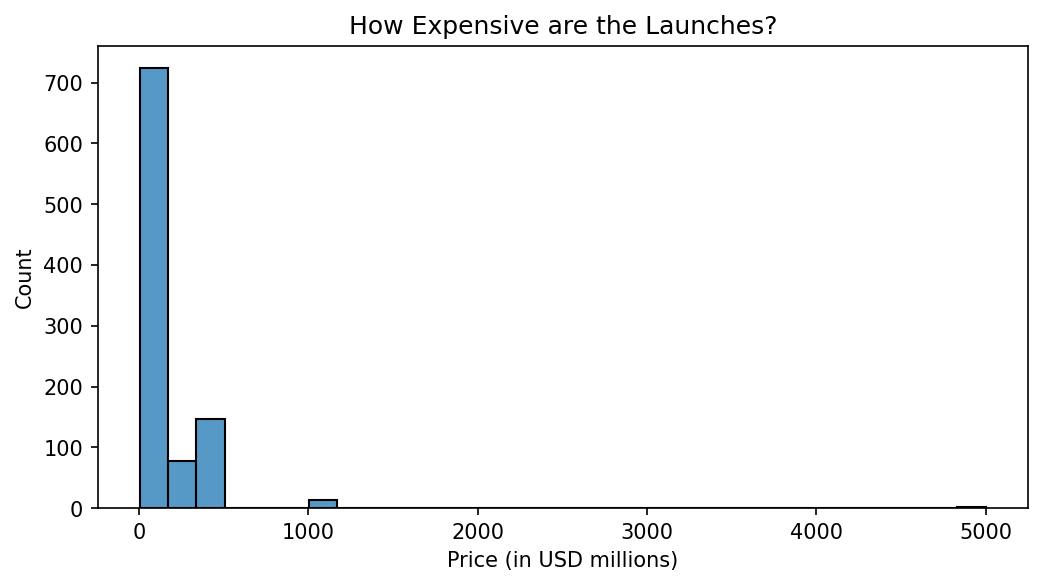

In [218]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=price_data,
             x=price_data[0],
             bins=30)
plt.xlabel('Price (in USD millions)')
plt.title('How Expensive are the Launches?')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [219]:
group_by_country = df_data.groupby('Location')['Date'].count()
group_by_country

Location
Blue Origin Launch Site, West Texas, Texas, USA                      12
Brigitte, Hammaguir, Algeria, France                                  4
Cosmic Girl, Mojave Air and Space Port, California, USA               1
Douglas F4D Skyray, Naval Air Station Point Mugu, California, USA     6
ELA-1, Guiana Space Centre, French Guiana, France                    15
                                                                     ..
Taiyuan Satellite Launch Center, China                                7
Uchinoura Space Center, Japan                                         7
VLS Pad, Alc?›ntara Launch Center, Maranh?œo, Brazil                  3
Vertical Launch Area, Spaceport America, New Mexico                   4
Xichang Satellite Launch Center, China                                1
Name: Date, Length: 137, dtype: int64

In [220]:
country_dic = group_by_country.to_dict()
country_dic

{'Blue Origin Launch Site, West Texas, Texas, USA': 12,
 'Brigitte, Hammaguir, Algeria, France': 4,
 'Cosmic Girl, Mojave Air and Space Port, California, USA': 1,
 'Douglas F4D Skyray, Naval Air Station Point Mugu, California, USA': 6,
 'ELA-1, Guiana Space Centre, French Guiana, France': 15,
 'ELA-2, Guiana Space Centre, French Guiana, France': 118,
 'ELA-3, Guiana Space Centre, French Guiana, France': 109,
 'ELD, Guiana Space Centre, French Guiana, France': 8,
 'ELS, Guiana Space Centre, French Guiana, France': 23,
 'ELV-1 (SLV), Guiana Space Centre, French Guiana, France': 26,
 'First Launch Pad, Satish Dhawan Space Centre, India': 42,
 'Imam Khomeini Spaceport, Semnan Space Center, Iran': 13,
 'Jiuquan Satellite Launch Center, China': 1,
 'K-407 Submarine, Barents Sea Launch Area, Barents Sea': 1,
 'K-496 Submarine, Barents Sea Launch Area, Barents Sea': 1,
 'K-84 Submarine, Barents Sea Launch Area, Barents Sea': 1,
 'LA-3, Wallops Flight Facility, Virginia, USA': 6,
 'LA-5B, RAAF 

In [221]:
for location in country_dic:
  country = location.split(",")[-1][1:]
  print(country, ":", country_dic[location])

USA : 12
France : 4
USA : 1
USA : 6
France : 15
France : 118
France : 109
France : 8
France : 23
France : 26
India : 42
Iran : 13
China : 1
Barents Sea : 1
Barents Sea : 1
Barents Sea : 1
USA : 6
Australia : 6
Japan : 73
Japan : 9
South Korea : 3
China : 5
USA : 1
USA : 21
USA : 21
USA : 20
China : 3
USA : 11
USA : 1
USA : 12
China : 60
China : 3
USA : 2
China : 42
USA : 5
USA : 120
USA : 56
USA : 11
USA : 1
USA : 4
USA : 7
China : 22
China : 21
Pacific Ocean : 36
USA : 13
USA : 7
USA : 3
Pacific Missile Range Facility : 1
Shahrud Missile Test Site : 1
Russia : 25
Japan : 34
USA : 1
USA : 5
USA : 5
Israel : 11
North Korea : 3
North Korea : 2
USA : 1
New Zealand : 13
USA : 80
USA : 67
USA : 21
USA : 28
USA : 4
USA : 10
USA : 49
USA : 70
USA : 75
USA : 39
USA : 43
USA : 43
USA : 111
USA : 97
USA : 3
USA : 83
USA : 93
USA : 10
USA : 10
USA : 12
USA : 7
Japan : 3
India : 8
Kenya : 8
Kenya : 1
India : 26
Kazakhstan : 193
Russia : 19
Kazakhstan : 12
Kazakhstan : 3
Kazakhstan : 2
Kazakhstan :

In [222]:
new_country_dic = {}

for location in country_dic:
  country = location.split(",")[-1][1:]
  value = country_dic[location]

  if country == 'Pacific Missile Range Facility' or country =='Pacific Ocean' or country == 'Gran Canaria' or country == 'New Mexico':
    country = 'USA'

  if country == 'Yellow Sea':
    country = 'China'

  if country == 'Iran' or country == 'Shahrud Missile Test Site':
    country = 'Iran, Islamic Republic of'

  if country == 'Russia' or country == 'Barents Sea':
    country = 'Russian Federation'

  if country == 'South Korea':
    country = 'Korea, Republic of'

  if country == 'North Korea':
    country = "Korea, Democratic People's Republic of"

  if country not in new_country_dic:
    new_country_dic[country] = value
  else:
    new_country_dic[country] += value

print(new_country_dic)

{'USA': 1387, 'France': 303, 'India': 76, 'Iran, Islamic Republic of': 14, 'China': 269, 'Russian Federation': 1398, 'Australia': 6, 'Japan': 126, 'Korea, Republic of': 3, 'Israel': 11, "Korea, Democratic People's Republic of": 5, 'New Zealand': 13, 'Kenya': 9, 'Kazakhstan': 701, 'Brazil': 3}


In [223]:
new_country_dic.keys()

dict_keys(['USA', 'France', 'India', 'Iran, Islamic Republic of', 'China', 'Russian Federation', 'Australia', 'Japan', 'Korea, Republic of', 'Israel', "Korea, Democratic People's Republic of", 'New Zealand', 'Kenya', 'Kazakhstan', 'Brazil'])

In [224]:
countries.get('USA').alpha3

'USA'

In [225]:
new_country_dic

{'USA': 1387,
 'France': 303,
 'India': 76,
 'Iran, Islamic Republic of': 14,
 'China': 269,
 'Russian Federation': 1398,
 'Australia': 6,
 'Japan': 126,
 'Korea, Republic of': 3,
 'Israel': 11,
 "Korea, Democratic People's Republic of": 5,
 'New Zealand': 13,
 'Kenya': 9,
 'Kazakhstan': 701,
 'Brazil': 3}

In [226]:
Name = list(new_country_dic.keys())
Count = list(new_country_dic.values())
ISO = [countries.get(country).alpha3 for country in new_country_dic]

print(Name)
print(ISO)
print(Count)

['USA', 'France', 'India', 'Iran, Islamic Republic of', 'China', 'Russian Federation', 'Australia', 'Japan', 'Korea, Republic of', 'Israel', "Korea, Democratic People's Republic of", 'New Zealand', 'Kenya', 'Kazakhstan', 'Brazil']
['USA', 'FRA', 'IND', 'IRN', 'CHN', 'RUS', 'AUS', 'JPN', 'KOR', 'ISR', 'PRK', 'NZL', 'KEN', 'KAZ', 'BRA']
[1387, 303, 76, 14, 269, 1398, 6, 126, 3, 11, 5, 13, 9, 701, 3]


In [227]:
data = {'Name': Name,
        'ISO': ISO,
        'Count': Count}
new_df = pd.DataFrame(data)
new_df

,Name,ISO,Count
0,USA,USA,1387
1,France,FRA,303
2,India,IND,76
3,"Iran, Islamic Republic of",IRN,14
4,China,CHN,269
5,Russian Federation,RUS,1398
6,Australia,AUS,6
7,Japan,JPN,126
8,"Korea, Republic of",KOR,3
9,Israel,ISR,11


In [228]:
world_map = px.choropleth(new_df,
                          locations='ISO',
                          color='Count',
                          hover_name='Name',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [229]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [230]:
df_data.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [231]:
location_list = df_data['Location'].tolist()
location_list[:10]

['LC-39A, Kennedy Space Center, Florida, USA',
 'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
 'Pad A, Boca Chica, Texas, USA',
 'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
 'SLC-41, Cape Canaveral AFS, Florida, USA',
 'LC-9, Taiyuan Satellite Launch Center, China',
 'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
 'LC-101, Wenchang Satellite Launch Center, China',
 'SLC-40, Cape Canaveral AFS, Florida, USA',
 'LA-Y1, Tanegashima Space Center, Japan']

In [232]:
countries_list = []
for location in location_list:
  country = location.split(",")[-1][1:]

  if country == 'Pacific Missile Range Facility' or country =='Pacific Ocean' or country == 'Gran Canaria' or country == 'New Mexico':
    country = 'USA'

  if country == 'Yellow Sea':
    country = 'China'

  if country == 'Iran' or country == 'Shahrud Missile Test Site':
    country = 'Iran, Islamic Republic of'

  if country == 'Russia' or country == 'Barents Sea':
    country = 'Russian Federation'

  if country == 'South Korea':
    country = 'Korea, Republic of'

  if country == 'North Korea':
    country = "Korea, Democratic People's Republic of"

  countries_list.append(country)

print(countries_list[:10])

['USA', 'China', 'USA', 'Kazakhstan', 'USA', 'China', 'Kazakhstan', 'China', 'USA', 'Japan']


In [233]:
print(len(location_list))
print(len(countries_list))

4324
4324


In [234]:
# ISO = [countries.get(country).alpha3 for country in new_country_dic]

In [235]:
countries_list[:10]

['USA',
 'China',
 'USA',
 'Kazakhstan',
 'USA',
 'China',
 'Kazakhstan',
 'China',
 'USA',
 'Japan']

In [236]:
country_name = pd.Series(countries_list)
country_name

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Length: 4324, dtype: object

In [237]:
ISO_list = [countries.get(country).alpha3 for country in countries_list]
ISO_list[:10]

['USA', 'CHN', 'USA', 'KAZ', 'USA', 'CHN', 'KAZ', 'CHN', 'USA', 'JPN']

In [238]:
ISO = pd.Series(ISO_list)
ISO

0       USA
1       CHN
2       USA
3       KAZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    KAZ
4323    KAZ
Length: 4324, dtype: object

In [239]:
df_data['ISO'] = ISO
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [240]:
df_data['Country'] = country_name
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan


In [241]:
failure_df = df_data[df_data['Mission_Status'] == 'Failure']
failure_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,CHN,China
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,NZL,New Zealand
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,USA
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,China
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN,China
...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA,USA
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,KAZ,Kazakhstan
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA


In [242]:
simple_df = failure_df[['ISO', 'Mission_Status']].groupby('ISO').count()
simple_df

,Mission_Status
ISO,
AUS,3
BRA,2
CHN,19
FRA,13
IND,8
IRN,8
ISR,2
JPN,10
KAZ,72


In [243]:
iso_index_list = simple_df.index.values.tolist()
iso_index_list

['AUS',
 'BRA',
 'CHN',
 'FRA',
 'IND',
 'IRN',
 'ISR',
 'JPN',
 'KAZ',
 'KOR',
 'NZL',
 'PRK',
 'RUS',
 'USA']

In [244]:
countries.get(iso_index_list[0])

Country(name='Australia', alpha2='AU', alpha3='AUS', numeric='036', apolitical_name='Australia')

In [245]:
full_name_list = [countries.get(iso).name for iso in iso_index_list]
full_name_list

['Australia',
 'Brazil',
 'China',
 'France',
 'India',
 'Iran, Islamic Republic of',
 'Israel',
 'Japan',
 'Kazakhstan',
 'Korea, Republic of',
 'New Zealand',
 "Korea, Democratic People's Republic of",
 'Russian Federation',
 'United States of America']

In [246]:
simple_df['Country'] = full_name_list
simple_df = simple_df.rename(columns={"Mission_Status": "Number of Failures"})
simple_df

,Number of Failures,Country
ISO,,
AUS,3,Australia
BRA,2,Brazil
CHN,19,China
FRA,13,France
IND,8,India
IRN,8,"Iran, Islamic Republic of"
ISR,2,Israel
JPN,10,Japan
KAZ,72,Kazakhstan


In [247]:
# Use a Choropleth Map to Show the Number of Failures by Country

In [248]:
failure_world_map = px.choropleth(simple_df,
                          locations=simple_df.index,
                          color='Number of Failures',
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.matter)

failure_world_map.update_layout(coloraxis_showscale=True,)

failure_world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [249]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan


In [250]:
country_org_status = df_data.groupby(by=['ISO',
                                         'Organisation',
                                         'Mission_Status'],
                                     as_index=False).agg({'Date': pd.Series.count})


# country_org_status = country_org_status.sort_values('Mission_Status', ascending=False)

country_org_status

,ISO,Organisation,Mission_Status,Date
0,AUS,AMBA,Success,1
1,AUS,CECLES,Failure,2
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [251]:
# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

burst = px.sunburst(country_org_status,
                    path=['ISO', 'Organisation', 'Mission_Status'],
                    values='Date',
                    title='Chart of the countries, organisations, and mission status.')

# burst.update_layout(xaxis_title='x',
#                     yaxis_title='y',
#                     coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [252]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan


In [253]:
df_data.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
ISO                  0
Country              0
dtype: int64

In [254]:
non_nan_df= df_data.dropna()
non_nan_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,China
...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA


In [255]:
non_nan_df.isna().sum()

Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
ISO               0
Country           0
dtype: int64

In [256]:
non_nan_df['Price']

0        50.0
1       29.75
3        65.0
4       145.0
5       64.68
        ...  
3855     59.0
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: object

In [257]:
non_nan_df['Price'] = non_nan_df['Price'].str.replace(',','')

<ipython-input-257-e78d8750ebdb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [258]:
non_nan_df['Price'] = non_nan_df['Price'].astype(float)
non_nan_df['Price']

<ipython-input-258-d0093f2b8cf2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: float64

In [259]:
non_nan_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,China
...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA


In [260]:
# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [261]:
money_spent_by_org = non_nan_df.groupby(by=['Organisation'],
                                        as_index=False).agg({'Price': pd.Series.sum})

money_spent_by_org = money_spent_by_org.sort_values('Price', ascending=False)

money_spent_by_org

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


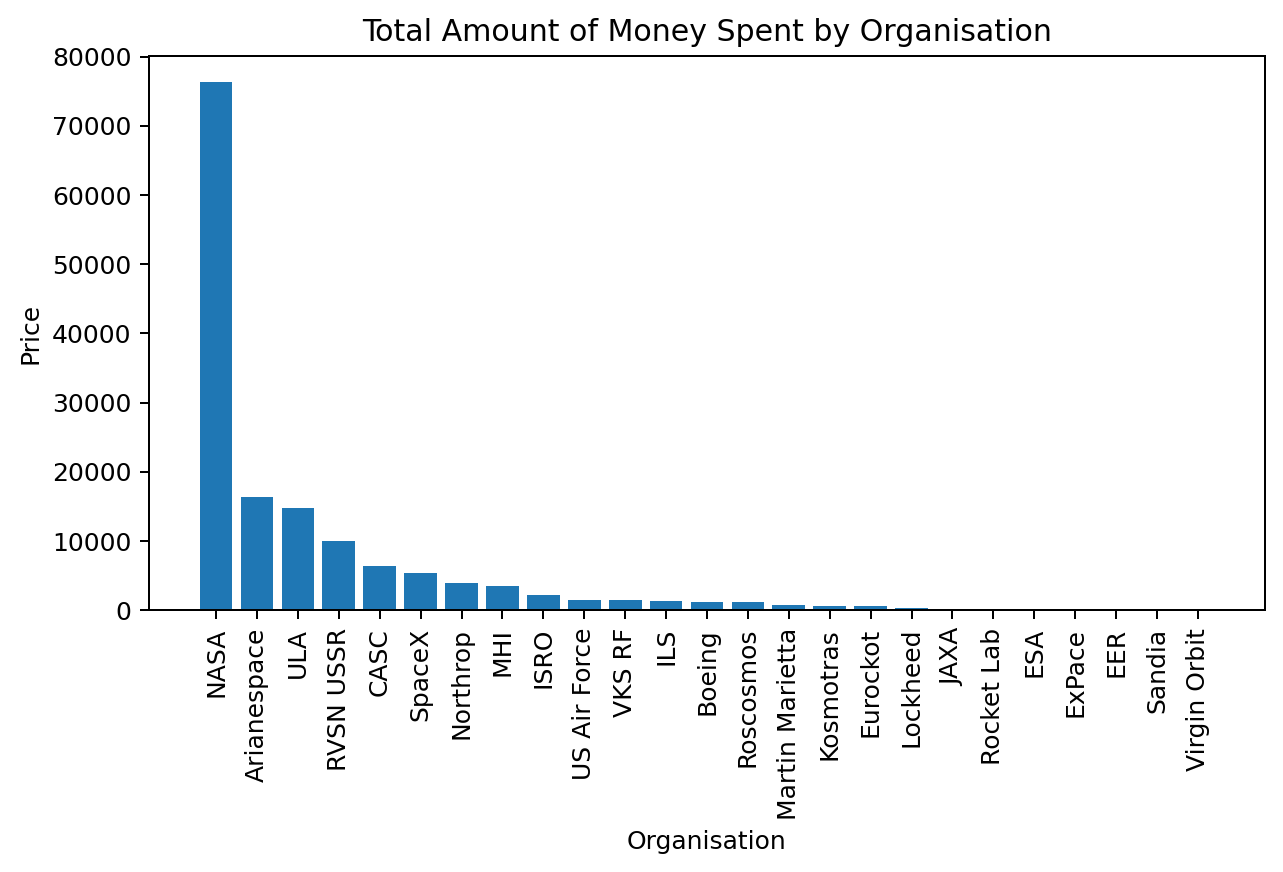

In [262]:
plt.figure(figsize=(8,4), dpi=180)

plt.bar(money_spent_by_org['Organisation'], money_spent_by_org['Price'])

plt.title("Total Amount of Money Spent by Organisation")

plt.xticks(rotation=90)


plt.xlabel('Organisation')
plt.ylabel('Price')

plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [263]:
non_nan_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,China
...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA


In [264]:
non_nan_df['Price']

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: float64

In [265]:
# Analyse the Amount of Money Spent by Organisation per Launch

In [266]:
price_by_org_df = non_nan_df[['Organisation','Price']].sort_values('Organisation')
price_by_org_df

,Organisation,Price
660,Arianespace,80.00
765,Arianespace,200.00
758,Arianespace,200.00
751,Arianespace,200.00
747,Arianespace,200.00
...,...,...
979,VKS RF,48.50
435,VKS RF,41.80
198,VKS RF,48.50
948,VKS RF,41.80


In [267]:
price_by_org_per_launch_series = price_by_org_df.groupby(['Organisation', 'Price'])['Price'].count()

print(type(price_by_org_per_launch_series))

price_by_org_per_launch_series

<class 'pandas.core.series.Series'>


Organisation  Price 
Arianespace   37.00     14
              48.50      2
              80.00      2
              190.00     3
              200.00    75
                        ..
VKS RF        35.00      1
              41.80     18
              48.50      9
              65.00      5
Virgin Orbit  12.00      1
Name: Price, Length: 76, dtype: int64

In [268]:
price_by_org_per_launch_df = pd.DataFrame(price_by_org_per_launch_series)
price_by_org_per_launch_df

Price
Organisation Price        
Arianespace  37.00      14
             48.50       2
             80.00       2
             190.00      3
             200.00     75
...                    ...
VKS RF       35.00       1
             41.80      18
             48.50       9
             65.00       5
Virgin Orbit 12.00       1

[76 rows x 1 columns]

In [269]:
price_by_org_per_launch_df.index.values

array([('Arianespace', 37.0), ('Arianespace', 48.5),
       ('Arianespace', 80.0), ('Arianespace', 190.0),
       ('Arianespace', 200.0), ('Boeing', 133.0), ('Boeing', 164.0),
       ('Boeing', 350.0), ('CASC', 5.3), ('CASC', 7.5), ('CASC', 20.14),
       ('CASC', 29.15), ('CASC', 29.75), ('CASC', 30.8), ('CASC', 64.68),
       ('CASC', 69.7), ('EER', 20.0), ('ESA', 37.0), ('Eurockot', 41.8),
       ('ExPace', 28.3), ('ILS', 65.0), ('ILS', 109.0), ('ILS', 115.0),
       ('ILS', 130.0), ('ILS', 135.0), ('ILS', 153.0), ('ISRO', 21.0),
       ('ISRO', 25.0), ('ISRO', 31.0), ('ISRO', 47.0), ('ISRO', 62.0),
       ('JAXA', 39.0), ('JAXA', 90.0), ('Kosmotras', 29.0),
       ('Lockheed', 35.0), ('MHI', 90.0), ('MHI', 112.5),
       ('Martin Marietta', 35.0), ('Martin Marietta', 136.6),
       ('NASA', 450.0), ('NASA', 1160.0), ('Northrop', 40.0),
       ('Northrop', 45.0), ('Northrop', 46.0), ('Northrop', 55.0),
       ('Northrop', 80.0), ('Northrop', 85.0), ('RVSN USSR', 5000.0),
       ('Ro

In [270]:
temp_org = [tuple[0] for tuple in price_by_org_per_launch_df.index.values]

print(len(temp_org))

temp_org

76


['Arianespace',
 'Arianespace',
 'Arianespace',
 'Arianespace',
 'Arianespace',
 'Boeing',
 'Boeing',
 'Boeing',
 'CASC',
 'CASC',
 'CASC',
 'CASC',
 'CASC',
 'CASC',
 'CASC',
 'CASC',
 'EER',
 'ESA',
 'Eurockot',
 'ExPace',
 'ILS',
 'ILS',
 'ILS',
 'ILS',
 'ILS',
 'ILS',
 'ISRO',
 'ISRO',
 'ISRO',
 'ISRO',
 'ISRO',
 'JAXA',
 'JAXA',
 'Kosmotras',
 'Lockheed',
 'MHI',
 'MHI',
 'Martin Marietta',
 'Martin Marietta',
 'NASA',
 'NASA',
 'Northrop',
 'Northrop',
 'Northrop',
 'Northrop',
 'Northrop',
 'Northrop',
 'RVSN USSR',
 'Rocket Lab',
 'Roscosmos',
 'Roscosmos',
 'Roscosmos',
 'Sandia',
 'SpaceX',
 'SpaceX',
 'SpaceX',
 'SpaceX',
 'SpaceX',
 'SpaceX',
 'ULA',
 'ULA',
 'ULA',
 'ULA',
 'ULA',
 'ULA',
 'ULA',
 'ULA',
 'ULA',
 'ULA',
 'US Air Force',
 'US Air Force',
 'VKS RF',
 'VKS RF',
 'VKS RF',
 'VKS RF',
 'Virgin Orbit']

In [271]:
temp_price = [tuple[1] for tuple in price_by_org_per_launch_df.index.values]

print(len(temp_price))

temp_price

76


[37.0,
 48.5,
 80.0,
 190.0,
 200.0,
 133.0,
 164.0,
 350.0,
 5.3,
 7.5,
 20.14,
 29.15,
 29.75,
 30.8,
 64.68,
 69.7,
 20.0,
 37.0,
 41.8,
 28.3,
 65.0,
 109.0,
 115.0,
 130.0,
 135.0,
 153.0,
 21.0,
 25.0,
 31.0,
 47.0,
 62.0,
 39.0,
 90.0,
 29.0,
 35.0,
 90.0,
 112.5,
 35.0,
 136.6,
 450.0,
 1160.0,
 40.0,
 45.0,
 46.0,
 55.0,
 80.0,
 85.0,
 5000.0,
 7.5,
 35.0,
 48.5,
 65.0,
 15.0,
 7.0,
 50.0,
 56.5,
 59.5,
 62.0,
 90.0,
 109.0,
 115.0,
 120.0,
 123.0,
 130.0,
 140.0,
 145.0,
 153.0,
 164.0,
 350.0,
 59.0,
 63.23,
 35.0,
 41.8,
 48.5,
 65.0,
 12.0]

In [272]:
price_by_org_per_launch_df.values

array([[ 14],
       [  2],
       [  2],
       [  3],
       [ 75],
       [  3],
       [  3],
       [  1],
       [  9],
       [  1],
       [  1],
       [ 25],
       [ 33],
       [ 38],
       [ 34],
       [ 17],
       [  1],
       [  1],
       [ 13],
       [  1],
       [  5],
       [  3],
       [  1],
       [  1],
       [  2],
       [  1],
       [ 16],
       [ 12],
       [ 22],
       [ 13],
       [  4],
       [  2],
       [  1],
       [ 22],
       [  8],
       [ 28],
       [  9],
       [  5],
       [  4],
       [136],
       [ 13],
       [ 55],
       [ 10],
       [  5],
       [  1],
       [  5],
       [  7],
       [  2],
       [ 13],
       [  2],
       [ 15],
       [  6],
       [  1],
       [  5],
       [ 34],
       [ 15],
       [  5],
       [ 37],
       [  3],
       [ 34],
       [  5],
       [  7],
       [  8],
       [  2],
       [  3],
       [  7],
       [ 10],
       [ 12],
       [ 10],
       [ 22],
       [  4],
      

In [273]:
type(price_by_org_per_launch_df.values)

numpy.ndarray

In [274]:
temp_count_np = price_by_org_per_launch_df.values.reshape(-1)

print(type(temp_count_np))

temp_count_np

<class 'numpy.ndarray'>


array([ 14,   2,   2,   3,  75,   3,   3,   1,   9,   1,   1,  25,  33,
        38,  34,  17,   1,   1,  13,   1,   5,   3,   1,   1,   2,   1,
        16,  12,  22,  13,   4,   2,   1,  22,   8,  28,   9,   5,   4,
       136,  13,  55,  10,   5,   1,   5,   7,   2,  13,   2,  15,   6,
         1,   5,  34,  15,   5,  37,   3,  34,   5,   7,   8,   2,   3,
         7,  10,  12,  10,  22,   4,   1,  18,   9,   5,   1])

In [275]:
temp_count = [num for num in temp_count_np]

print(type(temp_count))
print(len(temp_count))

temp_count

<class 'list'>
76


[14,
 2,
 2,
 3,
 75,
 3,
 3,
 1,
 9,
 1,
 1,
 25,
 33,
 38,
 34,
 17,
 1,
 1,
 13,
 1,
 5,
 3,
 1,
 1,
 2,
 1,
 16,
 12,
 22,
 13,
 4,
 2,
 1,
 22,
 8,
 28,
 9,
 5,
 4,
 136,
 13,
 55,
 10,
 5,
 1,
 5,
 7,
 2,
 13,
 2,
 15,
 6,
 1,
 5,
 34,
 15,
 5,
 37,
 3,
 34,
 5,
 7,
 8,
 2,
 3,
 7,
 10,
 12,
 10,
 22,
 4,
 1,
 18,
 9,
 5,
 1]

In [276]:
new_data = {'Organisation': temp_org,
          'Price': temp_price,
          'Count': temp_count}

new_df = pd.DataFrame(new_data)

new_df

,Organisation,Price,Count
0,Arianespace,37.00,14
1,Arianespace,48.50,2
2,Arianespace,80.00,2
3,Arianespace,190.00,3
4,Arianespace,200.00,75
...,...,...,...
71,VKS RF,35.00,1
72,VKS RF,41.80,18
73,VKS RF,48.50,9
74,VKS RF,65.00,5


<Axes: title={'center': 'Amount of Money Spent by Organisation per Launch'}, xlabel='Price', ylabel='Organisation'>

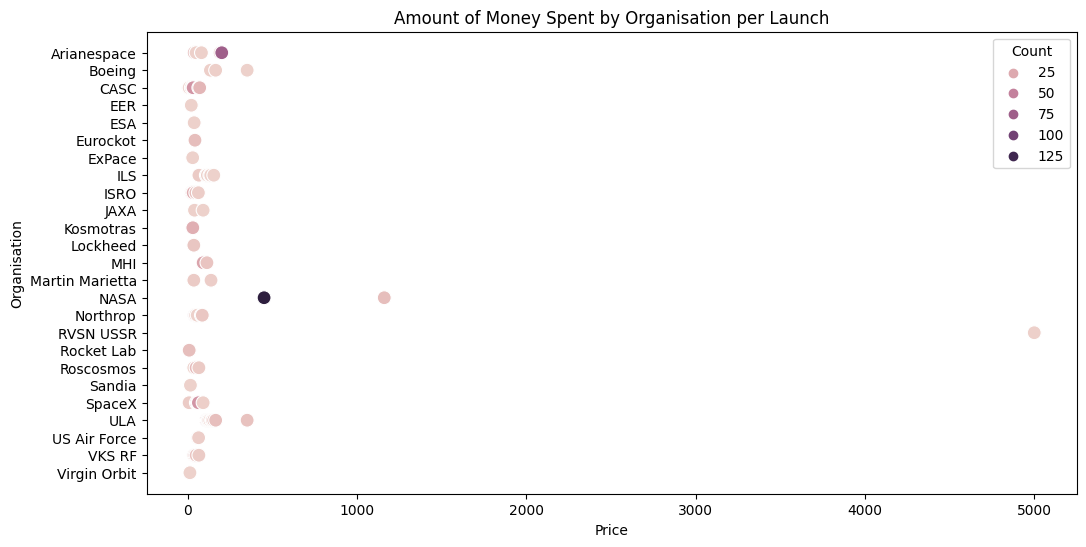

In [277]:
plt.figure(figsize=(12, 6))
plt.title('Amount of Money Spent by Organisation per Launch')

sns.scatterplot(x=new_df.Price,
                y=new_df.Organisation,
                hue=new_df.Count,
                s=100)

# Chart the Number of Launches per Year

In [278]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan


In [279]:
df_data['Date']

0       Fri Aug 07, 2020 05:12 UTC
1       Thu Aug 06, 2020 04:01 UTC
2       Tue Aug 04, 2020 23:57 UTC
3       Thu Jul 30, 2020 21:25 UTC
4       Thu Jul 30, 2020 11:50 UTC
                   ...            
4319    Wed Feb 05, 1958 07:33 UTC
4320    Sat Feb 01, 1958 03:48 UTC
4321    Fri Dec 06, 1957 16:44 UTC
4322    Sun Nov 03, 1957 02:30 UTC
4323    Fri Oct 04, 1957 19:28 UTC
Name: Date, Length: 4324, dtype: object

In [280]:
df_data['Date'][0]

'Fri Aug 07, 2020 05:12 UTC'

In [281]:
print(type(df_data['Date'][0]))

<class 'str'>


In [282]:
year_list = [int(string.split()[3]) for string in df_data['Date']]
print(len(year_list))
year_list[:10]

4324


[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]

In [283]:
df_data['Year'] = year_list
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan,1957


In [284]:
# Chart the Number of Launches per Year

In [285]:
num_per_year_df = pd.DataFrame()
num_per_year_df = df_data.groupby('Year').count()['Organisation']
num_per_year_df

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Organisation, Length: 64, dtype: int64

In [286]:
type(num_per_year_df)

pandas.core.series.Series

In [287]:
num_per_year_df.keys()

Int64Index([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Year')

In [288]:
num_per_year_df.values

array([  3,  28,  20,  39,  52,  82,  41,  60,  87, 101, 106, 103, 103,
       107, 119,  99, 103,  98, 113, 113, 114,  97,  49,  55,  71,  67,
        66,  69,  74,  62,  56,  59,  52,  80,  59,  62,  61,  64,  61,
        60,  70,  68,  57,  57,  43,  49,  52,  40,  37,  49,  50,  48,
        50,  37,  42,  38,  46,  53,  52,  90,  92, 117, 109,  63])

In [289]:
temp_year = [x for x in num_per_year_df.keys()]
print(len(temp_year))
print(type(temp_year))
temp_year[:10]

64
<class 'list'>


[1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966]

In [290]:
temp_count = [x for x in num_per_year_df.values]
print(len(temp_count))
print(type(temp_count))
temp_count[:10]

64
<class 'list'>


[3, 28, 20, 39, 52, 82, 41, 60, 87, 101]

In [291]:
temp_data = {'Year': temp_year,
             'Count': temp_count}

count_per_year_df = pd.DataFrame(temp_data)

count_per_year_df

,Year,Count
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


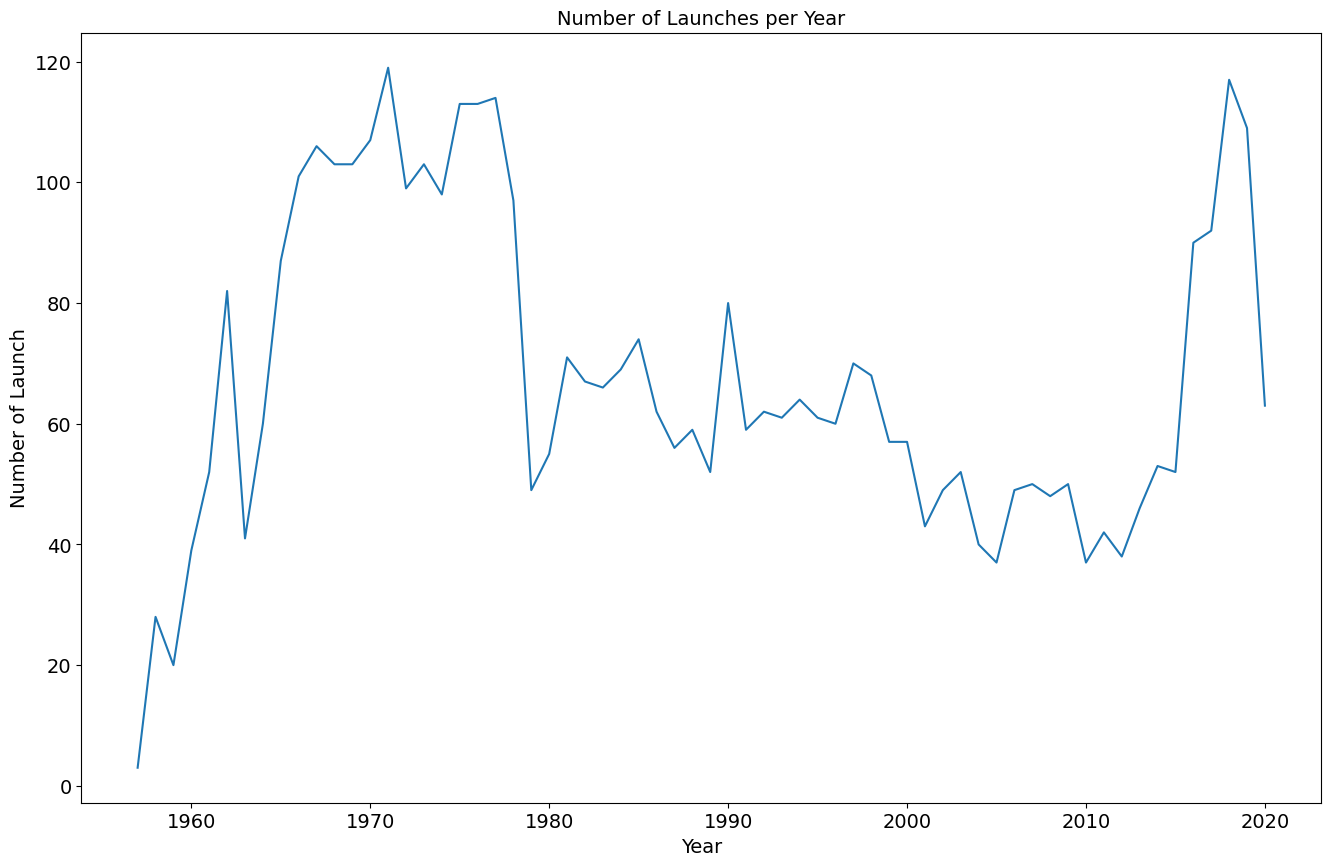

In [292]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launch', fontsize=14)
plt.title("Number of Launches per Year", fontsize=14)
plt.plot(count_per_year_df.Year, count_per_year_df.Count)

In [293]:
count_per_year_df.sort_values(by=['Count'], ascending=False)

,Year,Count
14,1971,119
61,2018,117
20,1977,114
19,1976,113
18,1975,113
...,...,...
53,2010,37
48,2005,37
1,1958,28
2,1959,20


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [294]:
df_data['Date']

0       Fri Aug 07, 2020 05:12 UTC
1       Thu Aug 06, 2020 04:01 UTC
2       Tue Aug 04, 2020 23:57 UTC
3       Thu Jul 30, 2020 21:25 UTC
4       Thu Jul 30, 2020 11:50 UTC
                   ...            
4319    Wed Feb 05, 1958 07:33 UTC
4320    Sat Feb 01, 1958 03:48 UTC
4321    Fri Dec 06, 1957 16:44 UTC
4322    Sun Nov 03, 1957 02:30 UTC
4323    Fri Oct 04, 1957 19:28 UTC
Name: Date, Length: 4324, dtype: object

In [295]:
df_data['Date'][0]

'Fri Aug 07, 2020 05:12 UTC'

In [296]:
type(df_data['Date'][0].split()[1])

str

In [297]:
datetime_str = df_data['Date'][0]
# datetime_str = "Fri Aug 07, 2020 05:12 UTC"
datetime_object = datetime.strptime(datetime_str, '%a %b %d, %Y %H:%M %Z')
print(datetime_object.date())

2020-08-07


In [298]:
datetime_list = []

for row in df_data['Date']:
  try:
    datetime_object = datetime.strptime(row, '%a %b %d, %Y %H:%M %Z')
    datetime_list.append(datetime_object.date())
  except ValueError:
    datetime.strptime(row, '%a %b %d, %Y')
    datetime_list.append(datetime_object.date())

datetime_list[:5]

[datetime.date(2020, 8, 7),
 datetime.date(2020, 8, 6),
 datetime.date(2020, 8, 4),
 datetime.date(2020, 7, 30),
 datetime.date(2020, 7, 30)]

In [299]:
df_data['Date'] = pd.to_datetime(datetime_list, errors='coerce')
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan,1957


In [300]:
year_month_count_df = df_data.groupby([df_data['Date'].dt.year, df_data['Date'].dt.month])['Date'].agg({'count'})
year_month_count_df

count
Date Date       
1957 10        1
     11        1
     12        1
1958 2         2
     3         3
...          ...
2020 4         5
     5         9
     6         7
     7        14
     8         3

[747 rows x 1 columns]

In [301]:
year_month_count_df.index

MultiIndex([(1957, 10),
            (1957, 11),
            (1957, 12),
            (1958,  2),
            (1958,  3),
            (1958,  4),
            (1958,  5),
            (1958,  6),
            (1958,  7),
            (1958,  8),
            ...
            (2019, 11),
            (2019, 12),
            (2020,  1),
            (2020,  2),
            (2020,  3),
            (2020,  4),
            (2020,  5),
            (2020,  6),
            (2020,  7),
            (2020,  8)],
           names=['Date', 'Date'], length=747)

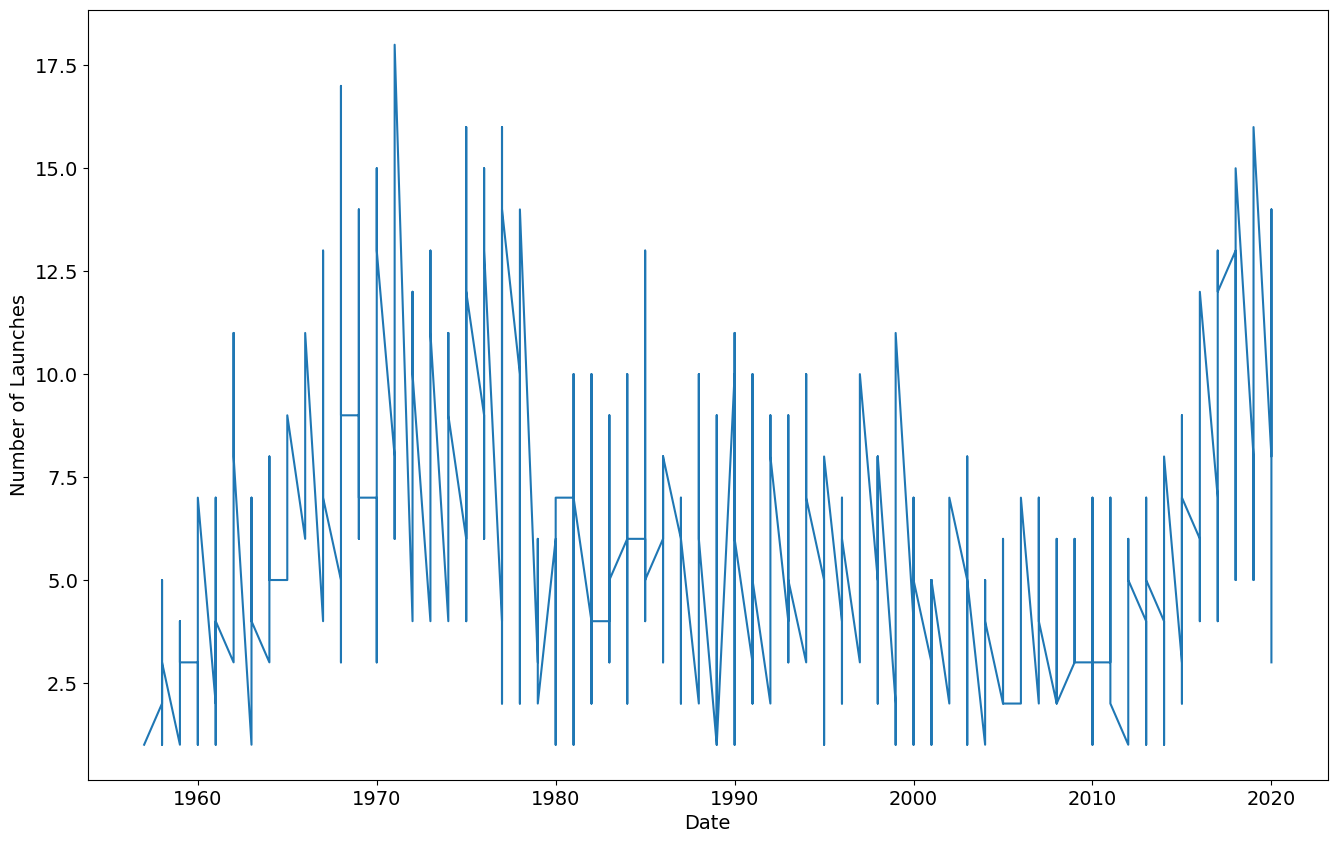

In [302]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

plt.plot(year_month_count_df.index.get_level_values(0), year_month_count_df['count'])

In [303]:
# Chart the Number of Launches Month-on-Month until the Present
# Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

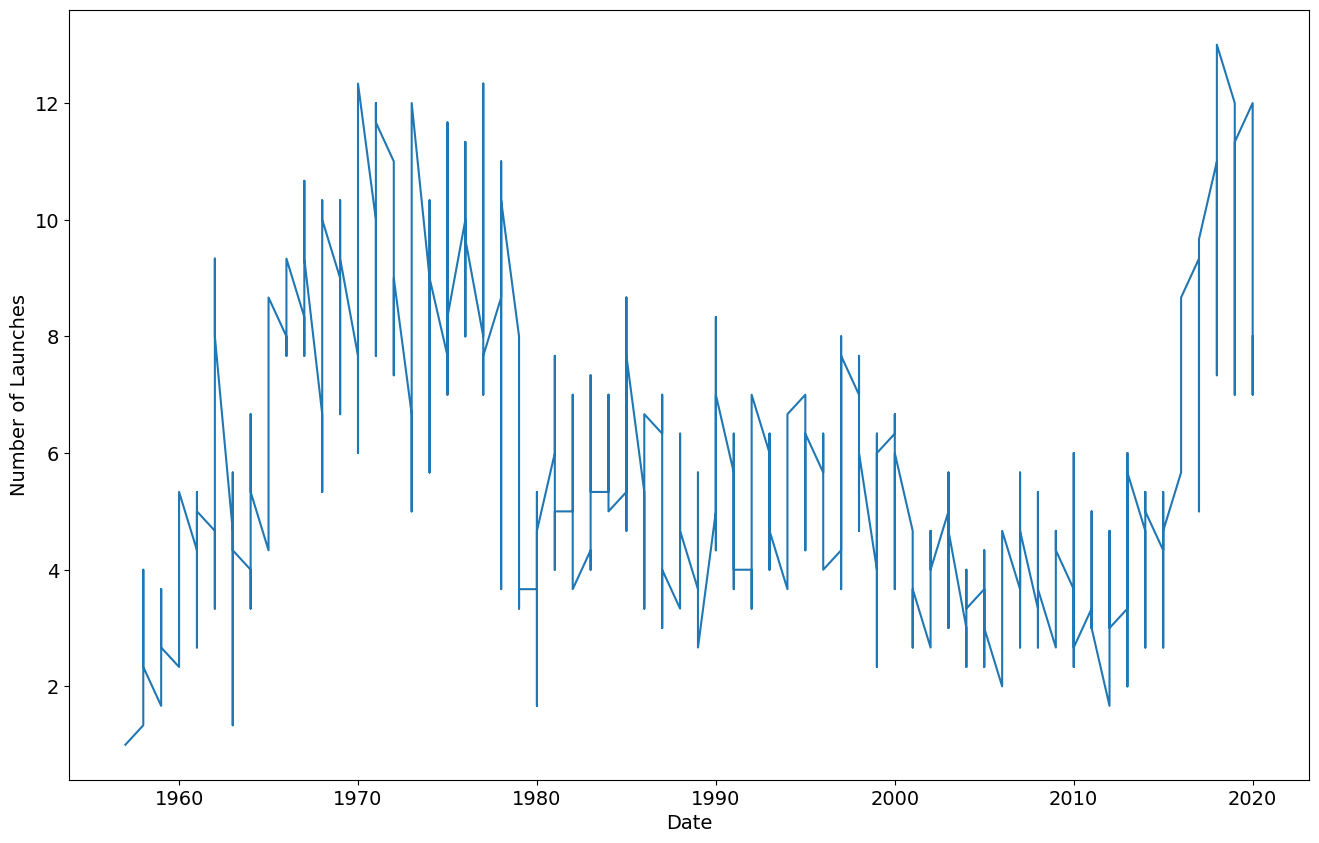

In [304]:
# This chart doesn't make sense...

roll_df = year_month_count_df.rolling(window=3).mean()  # Something is wrong here...

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

# plt.plot(year_month_count_df.index, year_month_count_df.count)
plt.plot(roll_df.index.get_level_values(0), roll_df['count'])

plt.show()

In [305]:
roll_df

count
Date Date       
1957 10      NaN
     11      NaN
     12     1.00
1958 2      1.33
     3      2.00
...          ...
2020 4      7.33
     5      7.33
     6      7.00
     7     10.00
     8      8.00

[747 rows x 1 columns]

In [306]:
year_month_count_df

count
Date Date       
1957 10        1
     11        1
     12        1
1958 2         2
     3         3
...          ...
2020 4         5
     5         9
     6         7
     7        14
     8         3

[747 rows x 1 columns]

In [307]:
year_month_count_df['count'].max()

18

In [308]:
year_month_count_df['count'].idxmax()

(1971, 12)

In [309]:
year_month_count_df.loc[(1971, 12)]

count    18
Name: (1971, 12), dtype: int64

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [310]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan,1957


In [311]:
df_data['Date']

0      2020-08-07
1      2020-08-06
2      2020-08-04
3      2020-07-30
4      2020-07-30
          ...    
4319   1958-02-05
4320   1958-02-01
4321   1957-12-06
4322   1957-11-03
4323   1957-10-04
Name: Date, Length: 4324, dtype: datetime64[ns]

In [312]:
df_data['Date'].dt.month

0        8
1        8
2        8
3        7
4        7
        ..
4319     2
4320     2
4321    12
4322    11
4323    10
Name: Date, Length: 4324, dtype: int64

In [313]:
df_data['Month'] = df_data['Date'].dt.month
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,7
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan,1957,11


In [314]:
by_month_count = df_data.groupby('Month')['Organisation'].count()
by_month_count

Month
1     270
2     335
3     352
4     383
5     327
6     402
7     353
8     370
9     368
10    379
11    336
12    449
Name: Organisation, dtype: int64

In [315]:
by_month_count_df = pd.DataFrame(by_month_count)
by_month_count_df

,Organisation
Month,
1,270
2,335
3,352
4,383
5,327
6,402
7,353
8,370
9,368


In [316]:
by_month_count_df.rename(columns={'Organisation':'Count'}, inplace=True)
by_month_count_df

,Count
Month,
1,270
2,335
3,352
4,383
5,327
6,402
7,353
8,370
9,368


In [317]:
# Launches per Month: Which months are most popular and least popular for launches?
# Some months have better weather than others. Which time of year seems to be best for space missions?

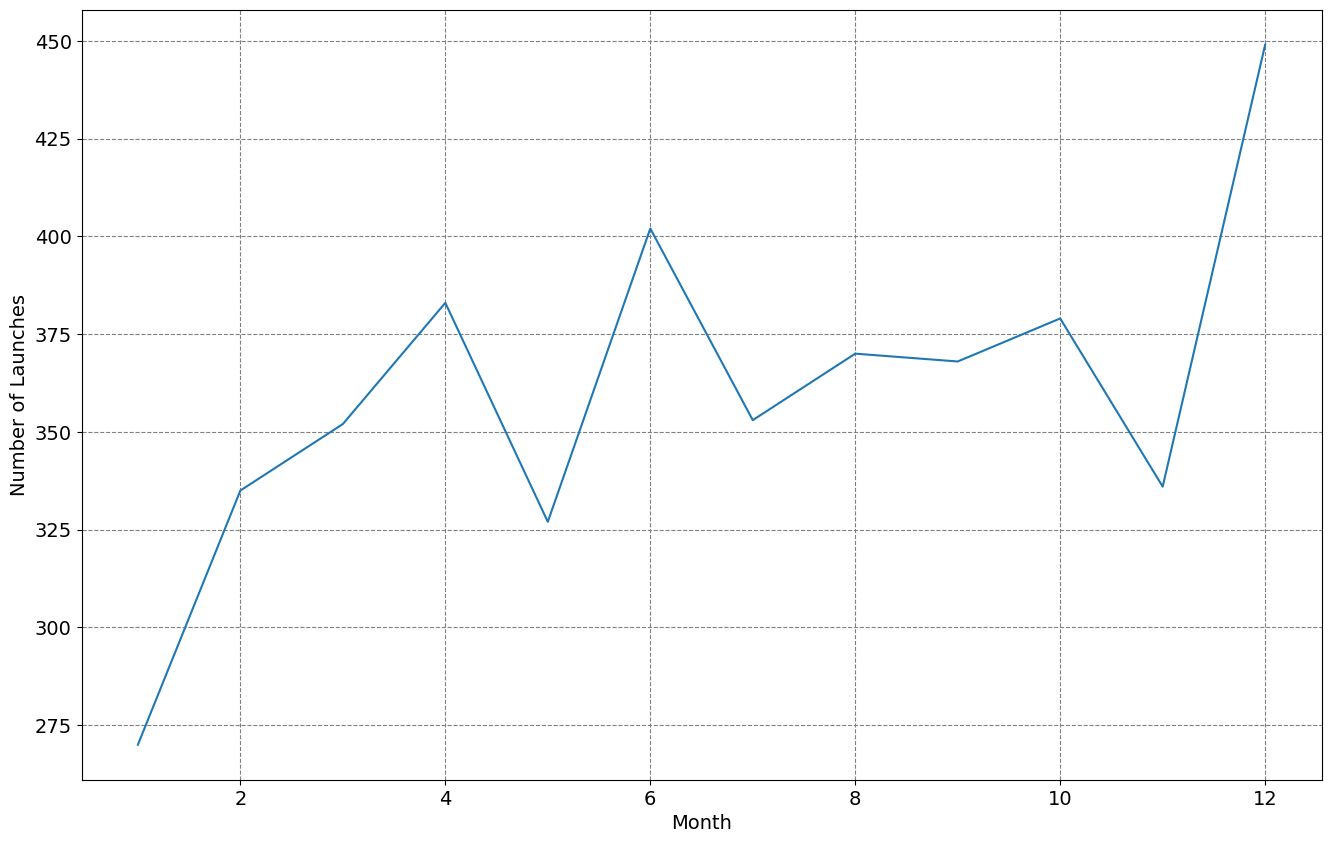

In [318]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.grid(color='grey', linestyle='--')

plt.plot(by_month_count_df.index, by_month_count_df.Count)

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [319]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,7
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan,1957,11


In [320]:
clean_df = df_data.dropna()
clean_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,7
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,China,2020,7
...,...,...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,Titan IIIB | KH-8,StatusRetired,59.0,Success,USA,USA,1966,7
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA,1965,5
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA,1965,2
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA,1964,12


In [321]:
price_list = []

for row in clean_df['Price']:
    row = row.replace(",", "")
    price = float(row)
    price_list.append(price)

print(len(price_list))
price_list[:5]

964


[50.0, 29.75, 65.0, 145.0, 64.68]

In [322]:
clean_df['Price'] = price_list
clean_df

<ipython-input-322-8b020d177788>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN,China,2020,7
...,...,...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,USA,1966,7
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA,1965,5
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA,1965,2
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA,1964,12


In [323]:
clean_df['Price'].describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

In [324]:
clean_df.resample('M', on='Date').mean()

<ipython-input-324-a681bf673b16>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Price,Year,Month
Date,,,
1964-09-30,63.23,"1,964.00",9.00
1964-10-31,NaN,NaN,NaN
1964-11-30,NaN,NaN,NaN
1964-12-31,63.23,"1,964.00",12.00
1965-01-31,NaN,NaN,NaN
...,...,...,...
2020-04-30,44.04,"2,020.00",4.00
2020-05-31,54.93,"2,020.00",5.00
2020-06-30,35.31,"2,020.00",6.00


In [325]:
price_by_date = clean_df.resample('M', on='Date').mean()['Price'].dropna()
price_by_date

<ipython-input-325-a0f057ae7e3a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Date
1964-09-30   63.23
1964-12-31   63.23
1965-02-28   63.23
1965-05-31   63.23
1966-07-31   59.00
              ... 
2020-04-30   44.04
2020-05-31   54.93
2020-06-30   35.31
2020-07-31   55.71
2020-08-31   39.88
Name: Price, Length: 388, dtype: float64

In [326]:
price_by_date_df = pd.DataFrame(price_by_date)
price_by_date_df

,Price
Date,
1964-09-30,63.23
1964-12-31,63.23
1965-02-28,63.23
1965-05-31,63.23
1966-07-31,59.00
...,...
2020-04-30,44.04
2020-05-31,54.93
2020-06-30,35.31


In [327]:
price_by_date_df.describe()

,Price
count,388.00
mean,226.51
std,407.24
min,7.00
25%,59.00
50%,112.79
75%,262.39
max,"5,000.00"


In [328]:
# How has the Launch Price varied Over Time?
# Create a line chart that shows the average price of rocket launches over time.

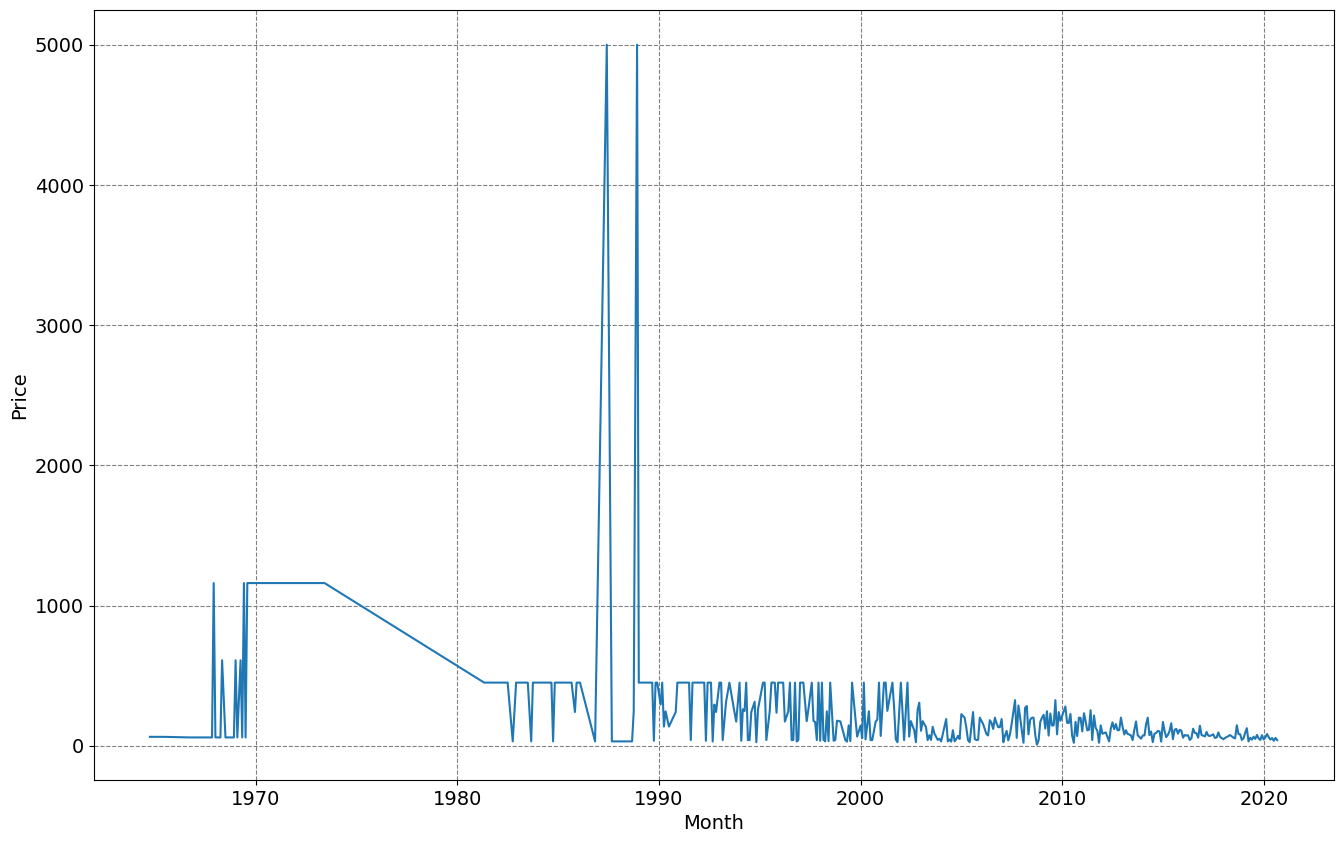

In [329]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(color='grey', linestyle='--')

plt.plot(price_by_date_df.index, price_by_date_df.Price)

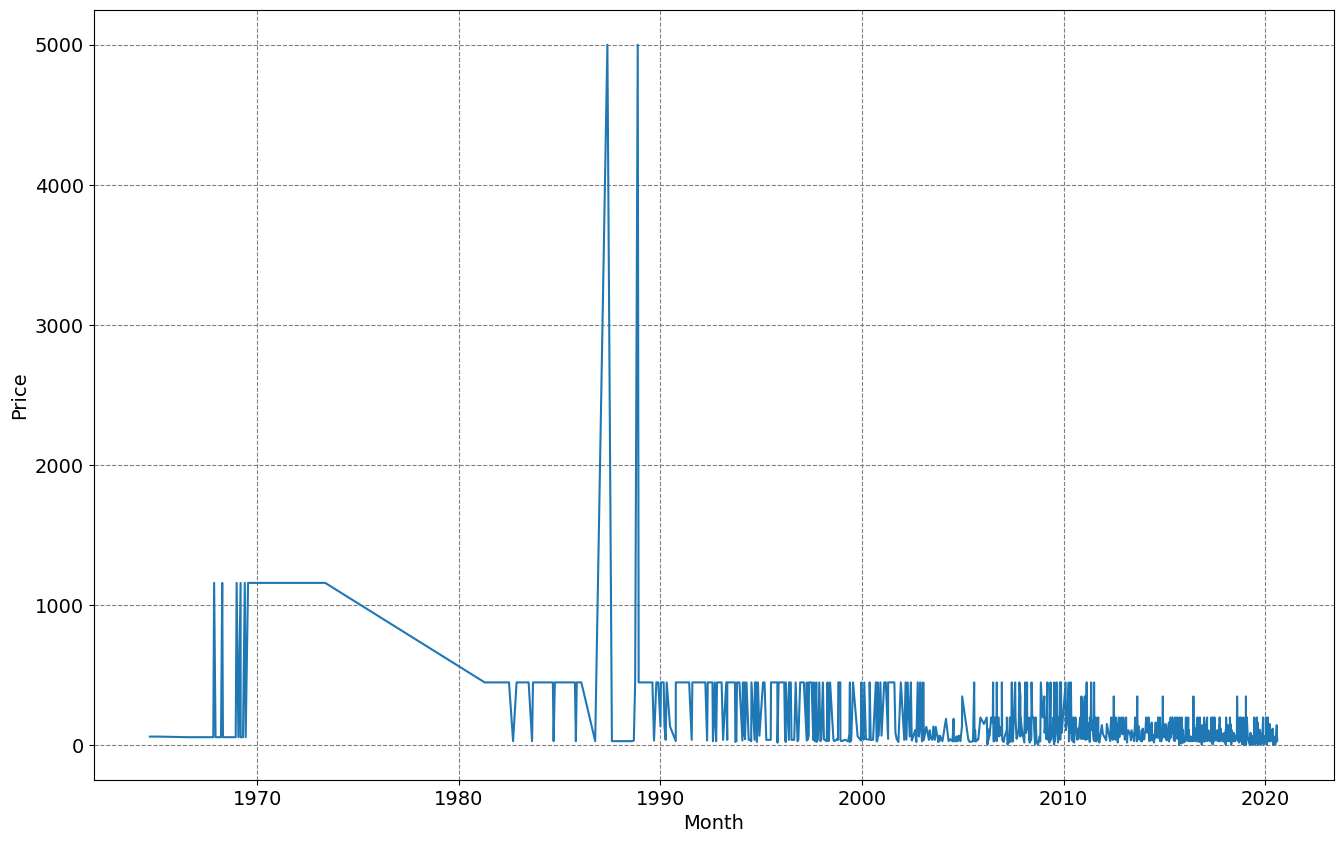

In [330]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(color='grey', linestyle='--')

plt.plot(clean_df.Date, clean_df.Price)

In [331]:
# Something is weird in both graphs...

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [332]:
top_10_org = df_data['Organisation'].value_counts()[:10]
print(top_10_org)
print()

top_10_org = top_10_org.index
top_10_org

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64



Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object')

In [333]:
for org in top_10_org:
  print(org)

RVSN USSR
Arianespace
CASC
General Dynamics
NASA
VKS RF
US Air Force
ULA
Boeing
Martin Marietta


In [334]:
simple_df = df_data[['Organisation', 'Date']]
simple_df

,Organisation,Date
0,SpaceX,2020-08-07
1,CASC,2020-08-06
2,SpaceX,2020-08-04
3,Roscosmos,2020-07-30
4,ULA,2020-07-30
...,...,...
4319,US Navy,1958-02-05
4320,AMBA,1958-02-01
4321,US Navy,1957-12-06
4322,RVSN USSR,1957-11-03


In [335]:
simple_df[simple_df['Organisation'] == 'RVSN USSR']

,Organisation,Date
1299,RVSN USSR,1998-08-12
1427,RVSN USSR,1996-08-29
1497,RVSN USSR,1995-08-02
1689,RVSN USSR,1992-07-13
1691,RVSN USSR,1992-07-08
...,...,...
4301,RVSN USSR,1958-09-23
4313,RVSN USSR,1958-05-15
4315,RVSN USSR,1958-04-27
4322,RVSN USSR,1957-11-03


In [336]:
for org in top_10_org:
  print(simple_df[simple_df['Organisation'] == org])

     Organisation       Date
1299    RVSN USSR 1998-08-12
1427    RVSN USSR 1996-08-29
1497    RVSN USSR 1995-08-02
1689    RVSN USSR 1992-07-13
1691    RVSN USSR 1992-07-08
...           ...        ...
4301    RVSN USSR 1958-09-23
4313    RVSN USSR 1958-05-15
4315    RVSN USSR 1958-04-27
4322    RVSN USSR 1957-11-03
4323    RVSN USSR 1957-10-04

[1777 rows x 2 columns]
     Organisation       Date
40    Arianespace 2020-03-21
48    Arianespace 2020-02-18
54    Arianespace 2020-02-06
58    Arianespace 2020-01-16
68    Arianespace 2019-12-18
...           ...        ...
2135  Arianespace 1985-05-08
2148  Arianespace 1985-02-08
2167  Arianespace 1984-11-10
2187  Arianespace 1984-08-04
2203  Arianespace 1984-05-23

[279 rows x 2 columns]
     Organisation       Date
1            CASC 2020-08-06
5            CASC 2020-07-25
7            CASC 2020-07-23
12           CASC 2020-07-09
14           CASC 2020-07-04
...           ...        ...
3110         CASC 1973-09-18
3215         CASC 1972-

In [337]:
df1 = pd.DataFrame()

for org in top_10_org:
  df2 = simple_df[simple_df['Organisation'] == org]
  df1 = pd.concat([df1, df2], ignore_index = True)

df1

,Organisation,Date
0,RVSN USSR,1998-08-12
1,RVSN USSR,1996-08-29
2,RVSN USSR,1995-08-02
3,RVSN USSR,1992-07-13
4,RVSN USSR,1992-07-08
...,...,...
3508,Martin Marietta,1966-08-26
3509,Martin Marietta,1966-06-16
3510,Martin Marietta,1965-12-21
3511,Martin Marietta,1965-10-15


In [338]:
df1.groupby('Organisation').count()

,Date
Organisation,
Arianespace,279
Boeing,136
CASC,251
General Dynamics,251
Martin Marietta,114
NASA,203
RVSN USSR,1777
ULA,140
US Air Force,161


<Axes: xlabel='Date', ylabel='Organisation'>

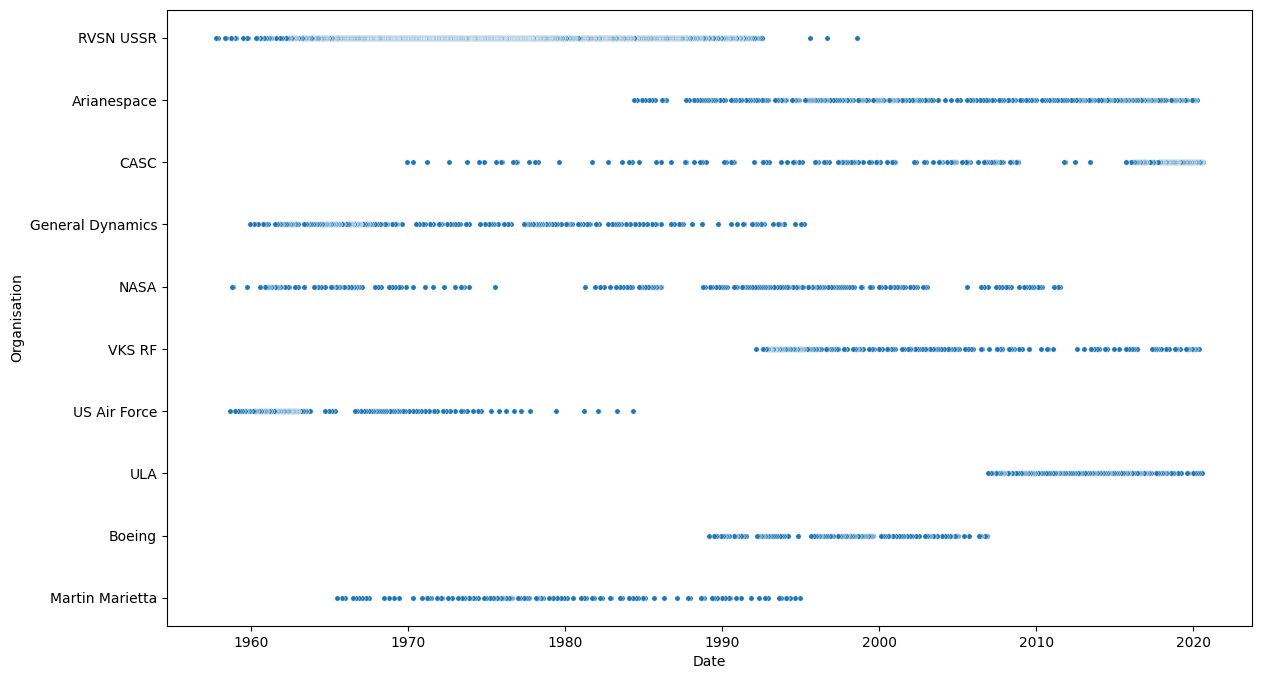

In [339]:
plt.figure(figsize=(14,8))
plt.title('')
# plt.grid(color='grey', linestyle='--')

sns.scatterplot(x=df1.Date,
                y=df1.Organisation,
                s=15)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [340]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,Kazakhstan,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,7
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,Kazakhstan,1957,11


In [341]:
df_data1 = df_data.groupby(['ISO','Year'])['Year'].size().reset_index(name='count')
df_data1

,ISO,Year,count
0,AUS,1967,1
1,AUS,1968,1
2,AUS,1969,1
3,AUS,1970,2
4,AUS,1971,1
...,...,...,...
407,USA,2016,27
408,USA,2017,30
409,USA,2018,34
410,USA,2019,27


In [342]:
RUS = df_data1[df_data1['ISO'] == 'RUS']
len(RUS)

60

In [343]:
USA = df_data1[df_data1['ISO'] == 'USA']
USA

,ISO,Year,count
348,USA,1957,1
349,USA,1958,23
350,USA,1959,16
351,USA,1960,30
352,USA,1961,43
...,...,...,...
407,USA,2016,27
408,USA,2017,30
409,USA,2018,34
410,USA,2019,27


In [344]:
cold_war = RUS.append(USA, ignore_index = True)
cold_war

<ipython-input-344-e2fbeb5df0ec>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ISO,Year,count
0,RUS,1961,2
1,RUS,1962,8
2,RUS,1963,8
3,RUS,1964,8
4,RUS,1965,10
...,...,...,...
119,USA,2016,27
120,USA,2017,30
121,USA,2018,34
122,USA,2019,27


In [345]:
cold_war_until_1991 = cold_war[cold_war['Year'] <= 1991]
cold_war_until_1991

,ISO,Year,count
0,RUS,1961,2
1,RUS,1962,8
2,RUS,1963,8
3,RUS,1964,8
4,RUS,1965,10
...,...,...,...
90,USA,1987,6
91,USA,1988,7
92,USA,1989,16
93,USA,1990,26


In [346]:
pivoted_df = cold_war_until_1991.pivot(index='Year', columns='ISO', values='count')
pivoted_df

ISO,RUS,USA
Year,,
1957,NaN,1.00
1958,NaN,23.00
1959,NaN,16.00
1960,NaN,30.00
1961,2.00,43.00
1962,8.00,60.00
1963,8.00,17.00
1964,8.00,24.00
1965,10.00,33.00


In [347]:
pivoted_df.describe()

ISO,RUS,USA
count,31.00,35.00
mean,38.32,18.91
std,20.11,12.00
min,2.00,1.00
25%,26.00,12.00
50%,39.00,16.00
75%,58.00,22.50
max,72.00,60.00


In [348]:
# Cold War Space Race: USA vs USSR
# The cold war lasted from the start of the dataset up until 1991.

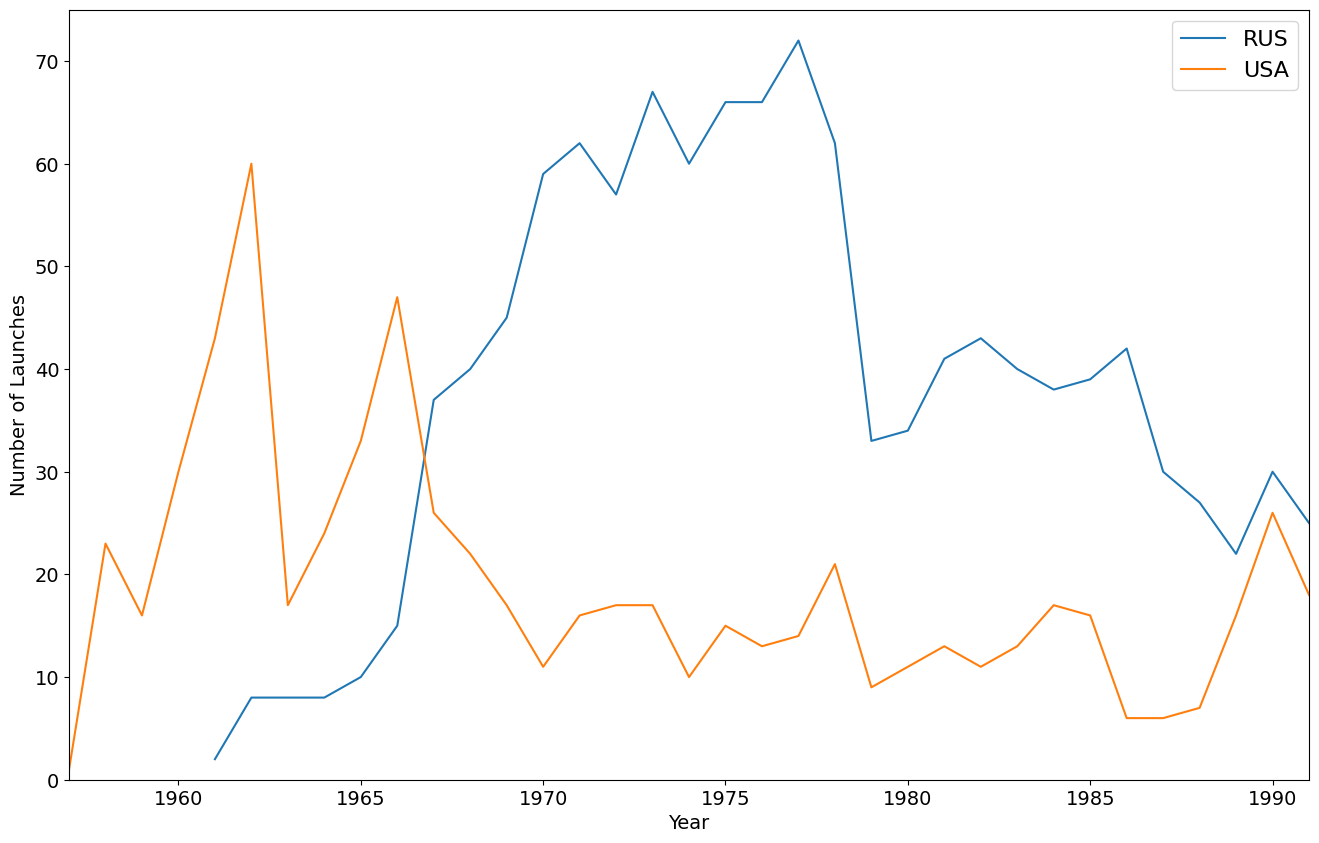

In [349]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 75)
plt.xlim(1957, 1991)

plt.plot(pivoted_df.index, pivoted_df.RUS, label=pivoted_df.RUS.name)
plt.plot(pivoted_df.index, pivoted_df.USA, label=pivoted_df.USA.name)

plt.legend(fontsize=16)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [350]:
cold_war_until_1991

,ISO,Year,count
0,RUS,1961,2
1,RUS,1962,8
2,RUS,1963,8
3,RUS,1964,8
4,RUS,1965,10
...,...,...,...
90,USA,1987,6
91,USA,1988,7
92,USA,1989,16
93,USA,1990,26


In [351]:
cold_war_df = cold_war_until_1991.ISO.value_counts()
cold_war_df

USA    35
RUS    31
Name: ISO, dtype: int64

In [352]:
fig = px.pie(labels=cold_war_df.index,
             values=cold_war_df.values,
             title="Total number of launches: USSR vs USA",
             names=cold_war_df.index,
             hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [353]:
only_USA_RUS = df_data.query('ISO == "USA" or ISO == "RUS"')
only_USA_RUS

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,7
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,USA,2020,7
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA",2020-07-15,Minotaur IV | NROL-129,StatusActive,46.0,Success,USA,USA,2020,7
...,...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,USA,1958,3
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,USA,1958,3
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2


In [354]:
only_USA_RUS.ISO.value_counts()

RUS    1398
USA    1387
Name: ISO, dtype: int64

In [355]:
USA_RUS_Year = only_USA_RUS[['ISO', 'Year']]
USA_RUS_Year

,ISO,Year
0,USA,2020
2,USA,2020
4,USA,2020
8,USA,2020
10,USA,2020
...,...,...
4317,USA,1958
4318,USA,1958
4319,USA,1958
4320,USA,1958


In [356]:
groupby_Year_ISO = only_USA_RUS.groupby(['Year', 'ISO'], as_index=False).agg({'Rocket_Status': pd.Series.count})
groupby_Year_ISO

,Year,ISO,Rocket_Status
0,1957,USA,1
1,1958,USA,23
2,1959,USA,16
3,1960,USA,30
4,1961,RUS,2
...,...,...,...
119,2018,USA,34
120,2019,RUS,9
121,2019,USA,27
122,2020,RUS,3


In [357]:
USA_RUS_pivoted_df = groupby_Year_ISO.pivot(index='Year', columns='ISO', values='Rocket_Status')
USA_RUS_pivoted_df

ISO,RUS,USA
Year,,
1957,NaN,1.00
1958,NaN,23.00
1959,NaN,16.00
1960,NaN,30.00
1961,2.00,43.00
...,...,...
2016,6.00,27.00
2017,6.00,30.00
2018,8.00,34.00


In [358]:
USA_RUS_pivoted_df.count()

ISO
RUS    60
USA    64
dtype: int64

In [359]:
USA_RUS_pivoted_df.isna().values.any()

True

In [360]:
USA_RUS_pivoted_df.fillna(0, inplace=True)
USA_RUS_pivoted_df.isna().values.any()

False

In [361]:
USA_RUS_pivoted_df

ISO,RUS,USA
Year,,
1957,0.00,1.00
1958,0.00,23.00
1959,0.00,16.00
1960,0.00,30.00
1961,2.00,43.00
...,...,...
2016,6.00,27.00
2017,6.00,30.00
2018,8.00,34.00


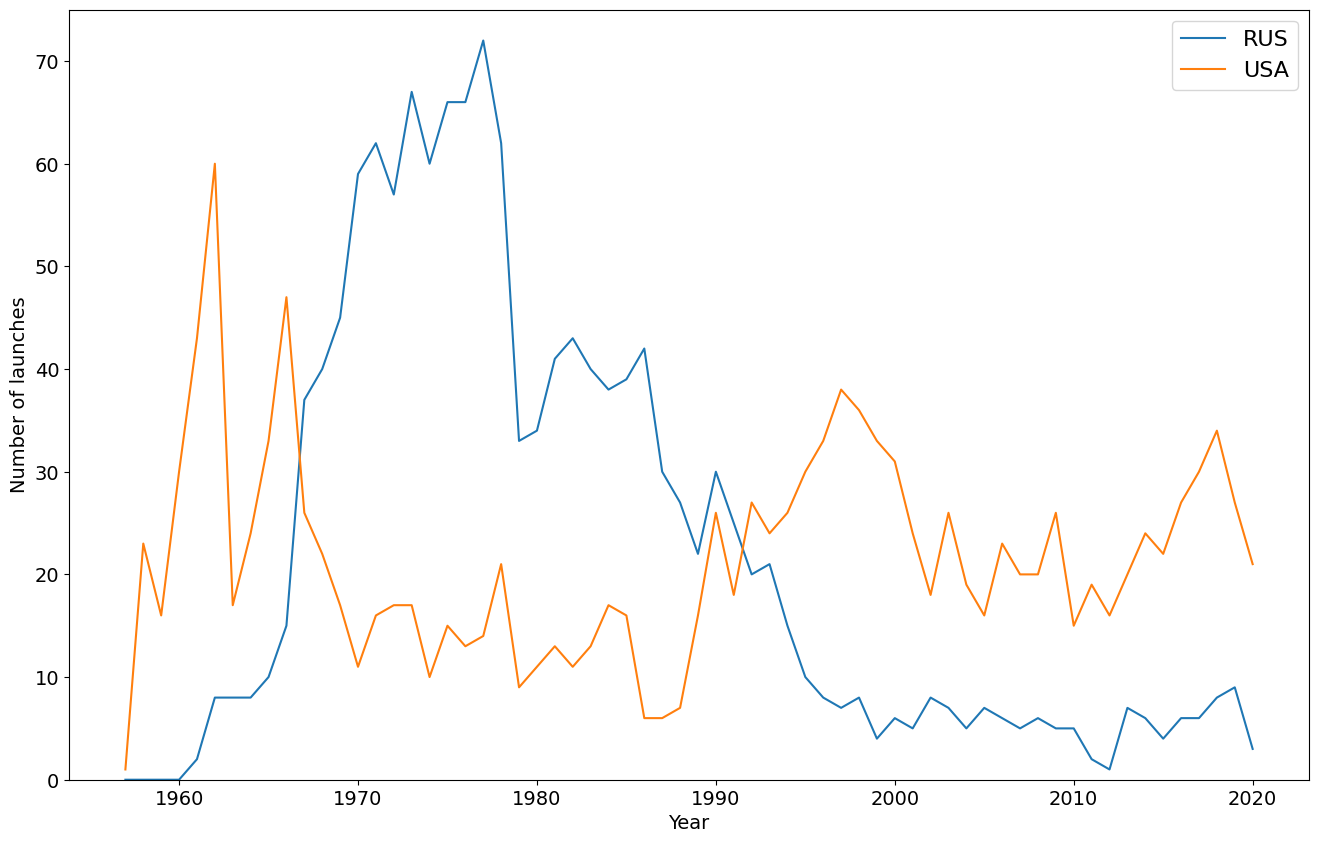

In [362]:
# Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
plt.ylim(0, 75)

plt.plot(USA_RUS_pivoted_df.index, USA_RUS_pivoted_df.RUS, label='RUS')
plt.plot(USA_RUS_pivoted_df.index, USA_RUS_pivoted_df.USA, label='USA')

plt.legend(fontsize=16)

## Chart the Total Number of Mission Failures Year on Year.

In [363]:
failures = df_data[df_data.Mission_Status == 'Failure']
failures

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10,"Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,CHN,China,2020,7
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand",2020-07-04,Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,NZL,New Zealand,2020,7
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...",2020-05-25,LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,USA,2020,5
36,CASC,"LC-2, Xichang Satellite Launch Center, China",2020-04-09,Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,China,2020,4
43,CASC,"LC-201, Wenchang Satellite Launch Center, China",2020-03-16,Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN,China,2020,3
...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA,USA,1958,4
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,KAZ,Kazakhstan,1958,4
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,USA,1958,3
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2


In [364]:
failures_by_year = failures.groupby(['Year'], as_index=False).agg({'Mission_Status': pd.Series.count})
failures_by_year

,Year,Mission_Status
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17
...,...,...
59,2016,2
60,2017,6
61,2018,2
62,2019,6


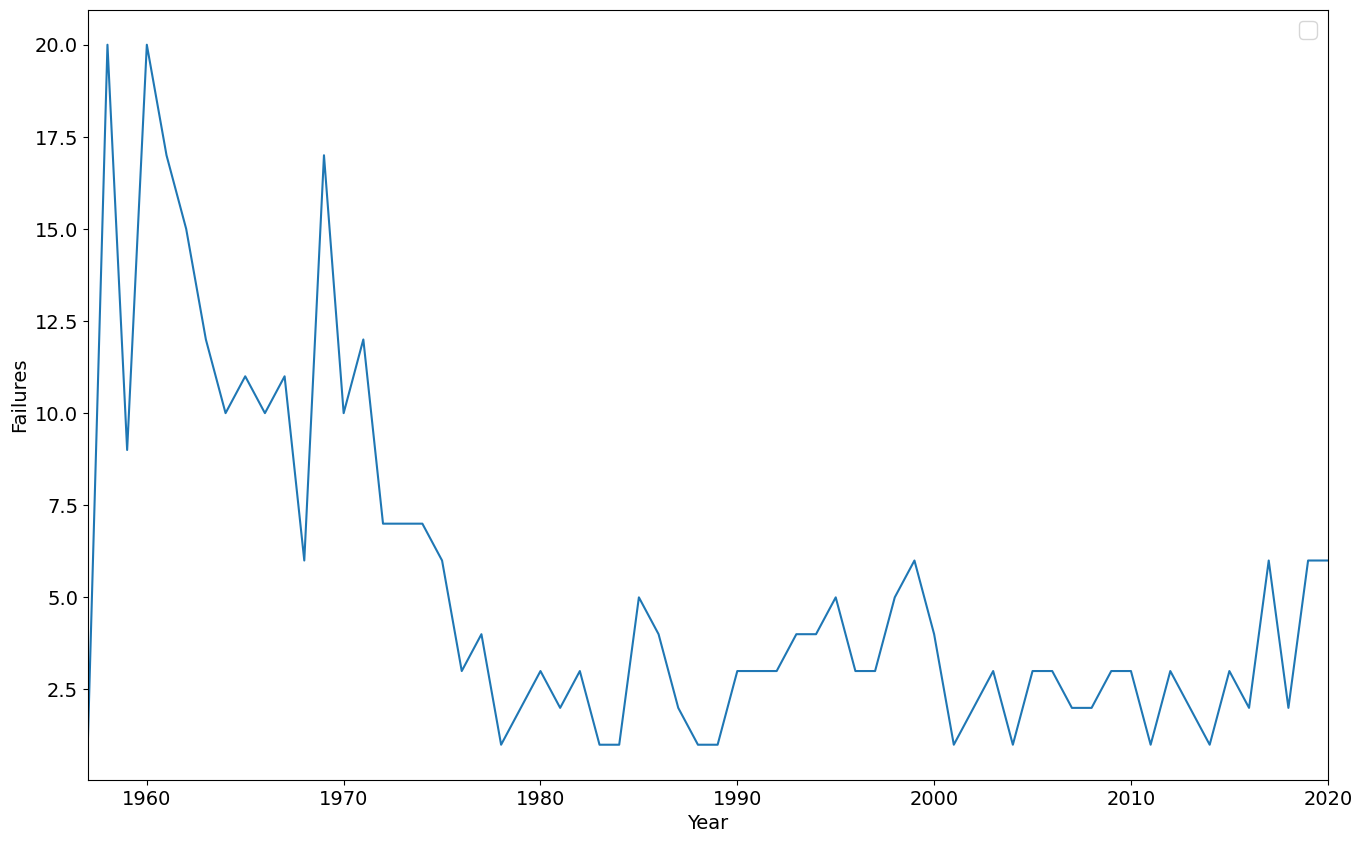

In [365]:
# Chart the Total Number of Mission Failures Year on Year.
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Failures', fontsize=14)
plt.xlim(1957, 2020)

plt.plot(failures_by_year.Year, failures_by_year.Mission_Status)

plt.legend(fontsize=16)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [366]:
yearly_status = df_data.groupby(['Year', 'Mission_Status'], as_index=False).agg({'Rocket_Status': pd.Series.count})
yearly_status

,Year,Mission_Status,Rocket_Status
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,20
3,1958,Partial Failure,2
4,1958,Success,6
...,...,...,...
173,2019,Partial Failure,2
174,2019,Prelaunch Failure,1
175,2019,Success,100
176,2020,Failure,6


In [367]:
yearly_status.rename(columns={'Rocket_Status':'Count'}, inplace=True)
yearly_status

,Year,Mission_Status,Count
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,20
3,1958,Partial Failure,2
4,1958,Success,6
...,...,...,...
173,2019,Partial Failure,2
174,2019,Prelaunch Failure,1
175,2019,Success,100
176,2020,Failure,6


In [368]:
v_bar_split = px.bar(x = yearly_status.Year,
                     y = yearly_status.Count,
                     color = yearly_status.Mission_Status,
                     title='Percentage of Failures over Time')

v_bar_split.update_layout(xaxis_title='Year',
                          yaxis_title='Number of launches')
v_bar_split.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [369]:
yearly_by_country = df_data.groupby(['Year', 'Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
yearly_by_country

,Year,Country,Mission_Status
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4
...,...,...,...
407,2020,Japan,3
408,2020,Kazakhstan,6
409,2020,New Zealand,3
410,2020,Russian Federation,3


In [370]:
yearly_by_country.rename(columns={'Mission_Status':'Number_of_Launches'}, inplace=True)
yearly_by_country

,Year,Country,Number_of_Launches
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4
...,...,...,...
407,2020,Japan,3
408,2020,Kazakhstan,6
409,2020,New Zealand,3
410,2020,Russian Federation,3


In [371]:
# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)
# Do the results change if we only look at the number of successful launches?

v_bar_split = px.bar(x = yearly_by_country.Year,
                     y = yearly_by_country.Number_of_Launches,
                     color = yearly_by_country.Country,
                     title='')

v_bar_split.update_layout(xaxis_title='Year',
                          yaxis_title='Number of Launches')
v_bar_split.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [372]:
yearly_org = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
yearly_org

,Year,Organisation,Mission_Status
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [373]:
yearly_org.rename(columns={'Mission_Status':'Number_of_Launches'}, inplace=True)
yearly_org

,Year,Organisation,Number_of_Launches
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [374]:
# # Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches
# Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?


v_bar_split = px.bar(x = yearly_org.Year,
                     y = yearly_org.Number_of_Launches,
                     color = yearly_org.Organisation,
                     title='')

v_bar_split.update_layout(xaxis_title='Year',
                          yaxis_title='Number of Launches')
v_bar_split.show()